#### Imports

In [1]:
# Visualization
import matplotlib.pyplot as plt

# Builtin
from pathlib import Path
import sys
import os
import pdb


# Add repo path to system path for additional imports. 
# Note the relative depth from this notebook to system repo
# in case you want to move this file

nb_path = str(Path(os.path.abspath('')).parent.parent)
sys.path.insert(0, nb_path)
print(f'Added {nb_path} to system path')

# This computer git repos
from project.project_manager_module import ProjectManager

Added C:\Users\Simo\Laskenta\Git_Repos\SystemTools to system path


#### Build paths
<font color=red>**Set the root_path to your SystemTools/scripts**</font>

In [2]:
#root_path = r"/opt2/Git_Repos/SystemTools/scripts/"
root_path = r"C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts"

In [3]:
project = "FCN22"  
experiment = "Figure2"  
experiment_path = Path.joinpath(Path(root_path), Path(project), experiment)

#### Data context for multiple analyzes and visualizations

In [4]:
to_spa_dict = {
    "startpoints": ["Comrad", "Bacon"],
    "parameters": ["gL"],
    "analyzes": [
        "Coherence",
        "Granger Causality",
        "Transfer Entropy",
        "Simulation Error",
        "Excitatory Firing Rate",
        "Inhibitory Firing Rate",
    ],
}

#### Call project manager
Code complexity is hidden behind the ProjectManager

In [5]:
PM = ProjectManager(
    path=experiment_path,
    input_folder="../in",
    output_folder="",
    matlab_workspace_file="",
    conn_skeleton_file_in="",
    conn_file_out="",
    input_filename="",
    NG_name="NG3_L4_SS_L4",
    t_idx_start=2000,
    t_idx_end=-2000,
    to_spa_dict=to_spa_dict,
    project=project,
    experiment=experiment,
)

#### Copy precalculated results to experiment folders

In [6]:
input_folder_list = [
    "precalculated_results/Single_narrow_iteration_R1/Comrad_gL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Bacon_gL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_control_EI_R1/Bacon_gL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_control_ALL_R1/Bacon_gL_compiled_results"
]
# These will appear under experiment_path
output_folder_list = [
    "Comrad_gL_compiled_results",
    "Bacon_gL_compiled_results",
    "Bacon_gL_compiled_results_EI",
    "Bacon_gL_compiled_results_ALL",
]
for this_input, this_output in zip(input_folder_list, output_folder_list):
    PM.transfer_precalculated_results(input_folder=this_input, output_folder=this_output)

### Vizualize mean of 10 iterations, results precalculated

<font color=#FF0000>**Activate each line one-by-one to get the four rows in Figure 2A**</font>

In [7]:
current_data = "Comrad_gL_compiled_results"
#current_data = "Bacon_gL_compiled_results"
#current_data = "Bacon_gL_compiled_results_EI"
#current_data = "Bacon_gL_compiled_results_ALL"

In [8]:
PM.context.output_folder = experiment_path.joinpath(current_data)

In [9]:
# PM.viz.save_figure_with_arrayidentifier = f"Fig2A_{current_data.replace('_compiled_results','')}" # Activate to save figures
PM.viz.save_figure_to_folder = f"Analysis_Figures"

Creating one figure for each neuron group


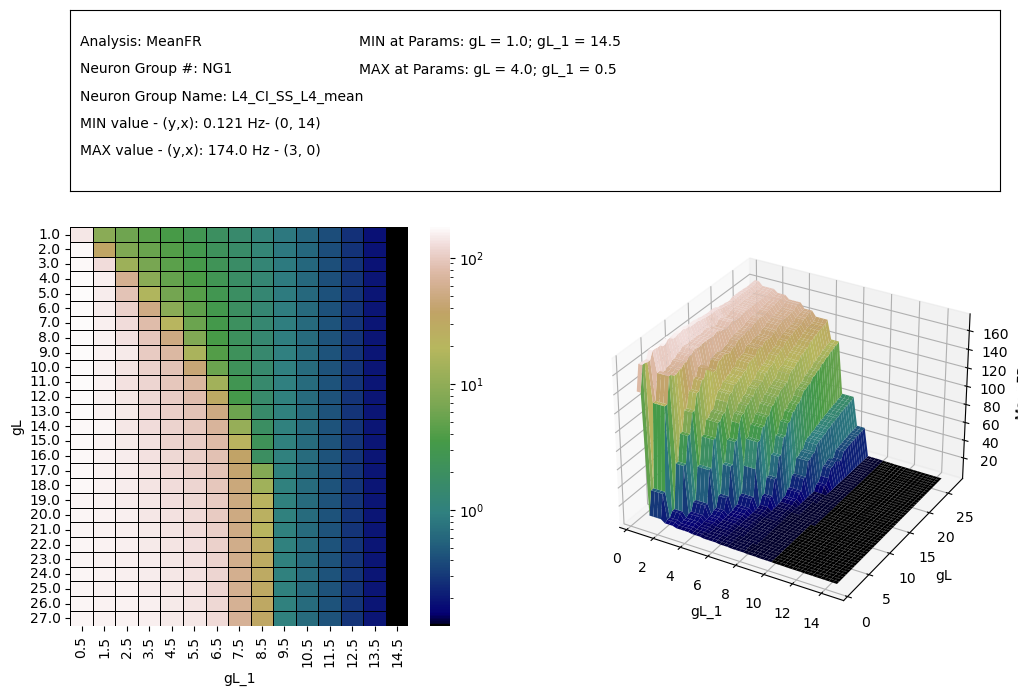

In [10]:
PM.viz.show_analyzed_arrayrun(
    csv_filename="MeanFR_mean.csv",
    analysis="MeanFR",
    variable_unit="Hz",
    logscale=True,
    annotation_2D=False,
    NG_id_list=['NG1'],
)

In [11]:
csv_filename = "Coherence_GrCaus_NormError_TransferEntropy_mean.csv"

All neuron groups requested


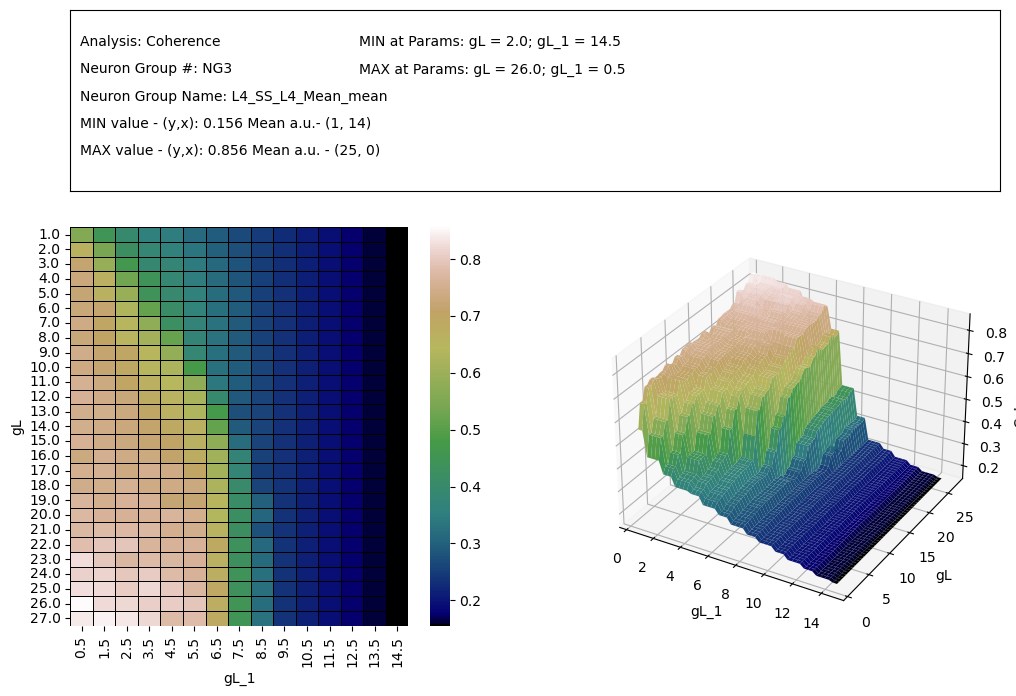

In [12]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="Coherence",
        variable_unit="Mean a.u.",
        annotation_2D=False,
    )

Creating one figure for each analysis
All neuron groups requested


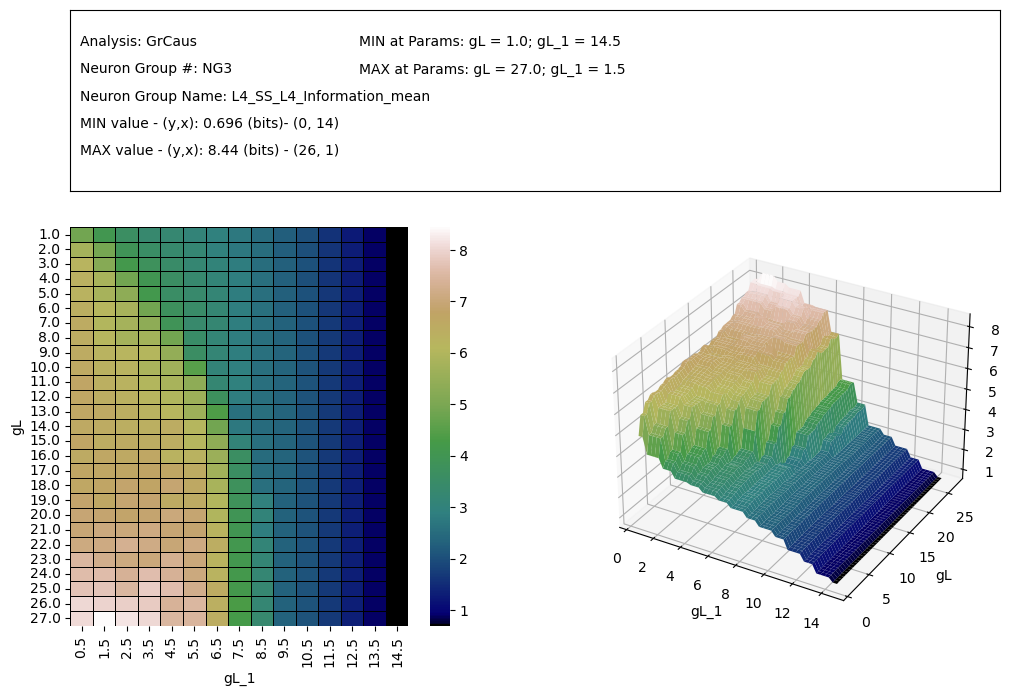

In [13]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="GrCaus",
        variable_unit="bit",
        annotation_2D=False,
    )

All neuron groups requested


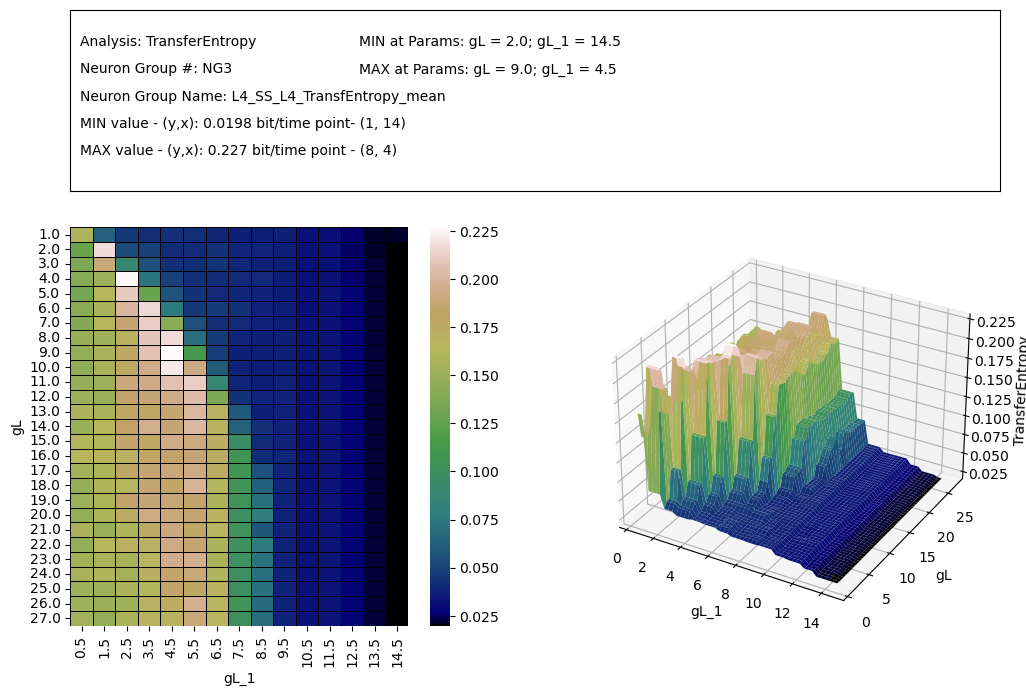

In [14]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="TransferEntropy",
        variable_unit="bit/time point",
        annotation_2D=False,
    )

All neuron groups requested


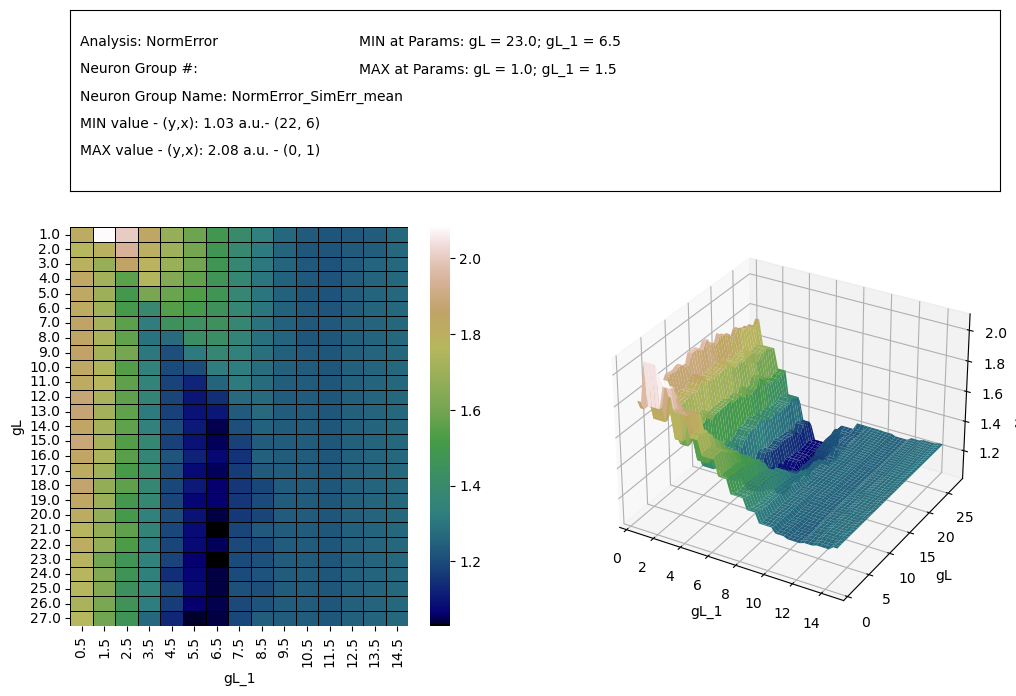

In [15]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="NormError",
        variable_unit="a.u.",
        annotation_2D=False,
    )

In [16]:
# PM.viz.save_figure_with_arrayidentifier = f'Fig2B_category_plot' # Activate to save figures
plt.rcParams['figure.figsize'] = (16, 4)

### Figure 2B
#### Comparison of information quantities between Comrad, Bacon and the two dataset with randomized connections.

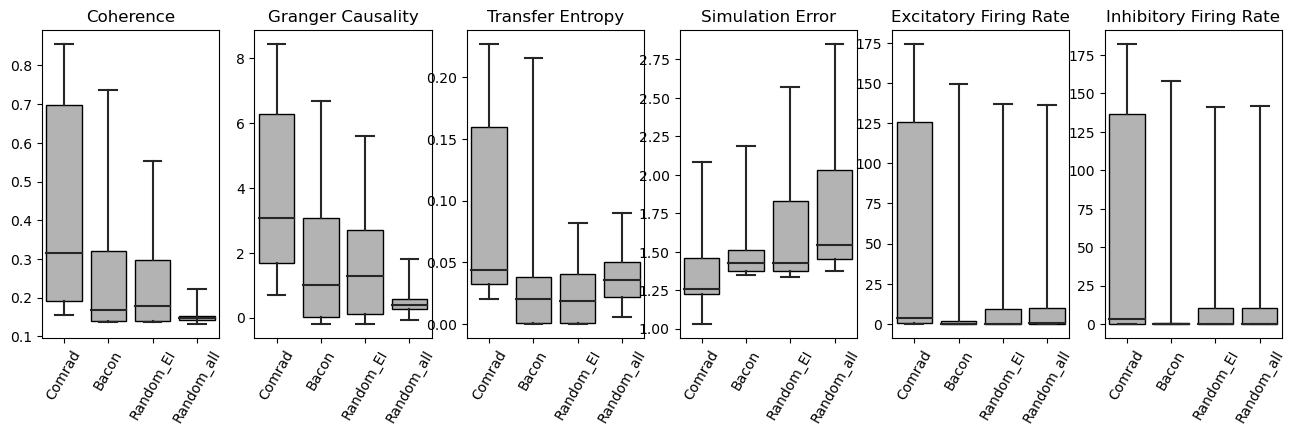

In [17]:
"""
Definitions for parametric plotting of multiple conditions/categories.
First, define what data is going to be visualized in to_spa_dict above.
Second, define how it is visualized in param_plot_dict below.

Limitations: 
    You cannot have analyzes as title AND inner_sub = True.

outer : panel (distinct subplots) # analyzes, startpoints, parameters, controls
inner : inside one axis (subplot) # startpoints, parameters, controls
inner_sub : bool, further subdivision by value, such as mean firing rate
inner_sub_ana : name of ana. This MUST be included into to_spa_dict "analyzes"
plot_type : parametric plot type 

compiled_results : bool, data at compiled_results folder, mean over iterations

inner_paths : bool, Provide comparison from arbitrary paths, e.g. controls. The 'inner' is ignored.
inner_path_names: list of names of paths to compare.
paths : provide list of tuples of full path parts to data folder. 
E.g. [(path, 'Single_narrow_iterations_control', 'Bacon_gL_compiled_results'),] 
The number of paths MUST be the same as the number of corresponding inner variables. 
"""

param_plot_dict = {
    "title": "parameters", 
    "outer": "analyzes",  
    "inner": "startpoints",  # If "inner_paths" is True, this 'inner' is ignored 
    "inner_sub": False,  # Cannot be activated without additional options
    "plot_type": "box",  # "violin" (2), "box", "strip", "swarm", "boxen", "point", "bar"
    "compiled_results": True, 
    "sharey": False,
    "palette": "Greys",
    "inner_paths": True,
    "inner_path_names": ["Comrad", "Bacon", "Random_EI", "Random_all"],
    "paths": [
        (experiment_path, 'Comrad_gL_compiled_results'),
        (experiment_path, 'Bacon_gL_compiled_results'),
        (experiment_path, 'Bacon_gL_compiled_results_EI'),
        (experiment_path, 'Bacon_gL_compiled_results_ALL'),
        ],
    "inner_stat_test": False,
    "save_description": False, # Cannot be activated without additional options
    "display_optimal_values": False, # Cannot be activated without additional options
}
PM.viz.show_catplot(param_plot_dict)